### Detect Overfitting and Underfitting with Learning Curves
For this quiz, we'll be using three models to train the circular dataset below.

* A Decision Tree model,
* Logistic Regression model, and
* Support Vector Machine model.

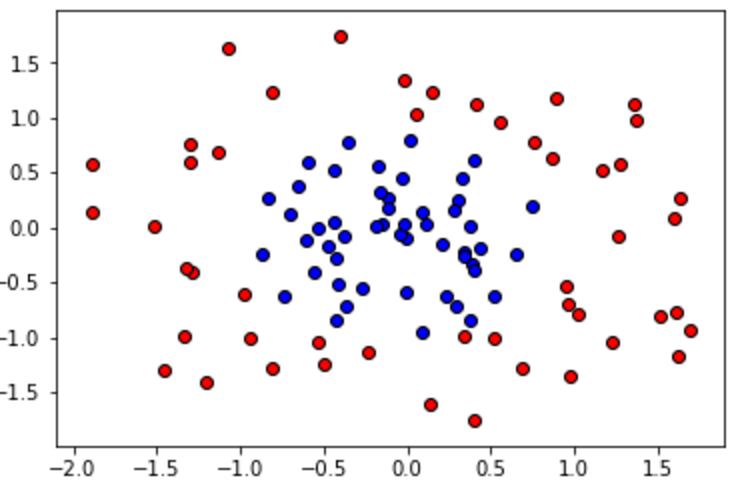

One of the models overfits, one underfits, and the other one is just right. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.

First, let's remember that the way the curves look for the three models, is as follows:

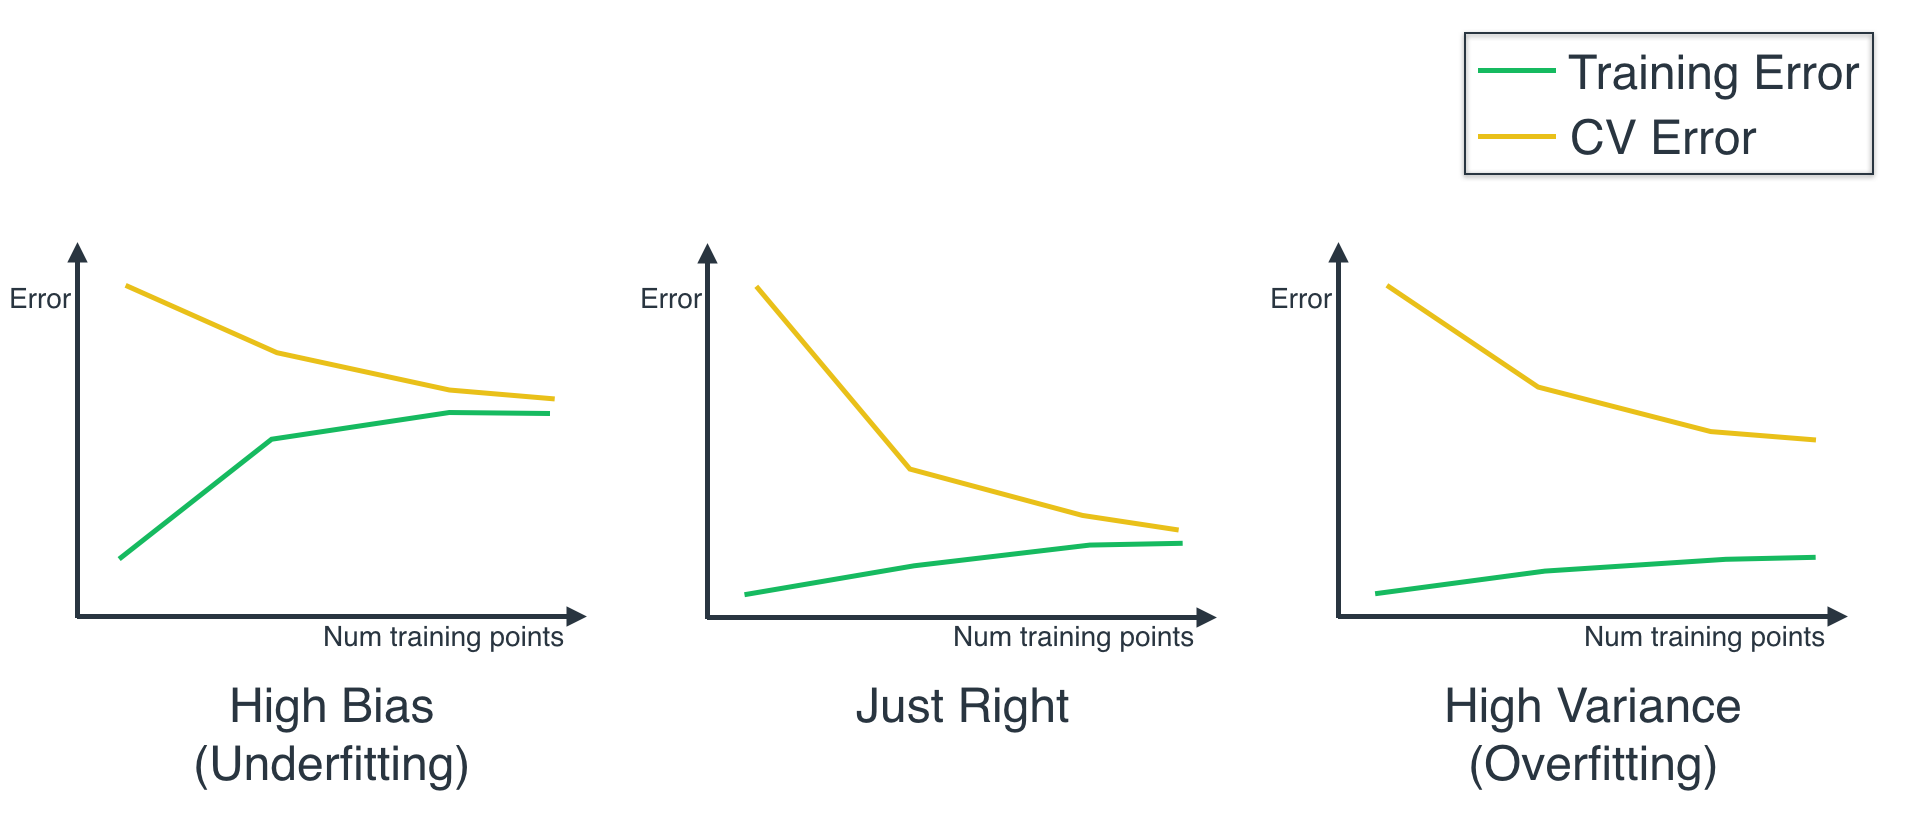

We'll be using the function called `learning_curve`:

```
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
```

No need to worry about all the parameters of this function (you can read some more in [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), but here we'll explain the main ones:

* `estimator`, is the actual classifier we're using for the data, e.g., `LogisticRegression()` or `GradientBoostingClassifier()`.
* `X` and `y` is our data, split into features and labels.
* `train_sizes` are the sizes of the chunks of data used to draw each point in the curve.
* `train_scores` are the training scores for the algorithm trained on each chunk of data.
* `test_scores` are the testing scores for the algorithm trained on each chunk of data.

Two very important observations:

The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.

**Very important**: As you can see, we defined our curves with Training and Testing Error, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

Part 1: Drawing the learning curves
In here, we'll be comparing three models:

* A Logistic Regression model.
* A Decision Tree model.
* A Support Vector Machine model with an rbf kernel, and a gamma parameter of 1000 (we'll learn what these mean later).
                                                                                  
If you're curious about the code used to draw the learning curves, it's on the **utils.py** tab.                                                                                  

In [9]:
# Import, read, and split data
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')
X = np.array(df[['x1', 'x2']])
Y = np.array(df['y'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 



### Import classifiers
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# import functions from utils
from utils import draw_learning_curves, randomize

In [13]:
### Logistic Regression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

print('Training Accuracy: {}'.format(accuracy_score(Y_train, y_pred_train)))
print('Testing Accuracy: {}'.format(accuracy_score(Y_test, y_pred_test)))

Training Accuracy: 0.6125
Testing Accuracy: 0.55


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


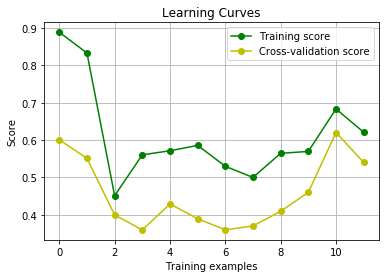

In [17]:
from utils import draw_learning_curves, randomize
#X_r, Y_r = randomize(X, Y)

draw_learning_curves(X, Y, LogisticRegression(solver = 'lbfgs'), 12)

In [26]:
### Decision Tree
classifier = DecisionTreeClassifier()

classifier.fit(X_train,Y_train)

y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

print('Training Accuracy: {}'.format(accuracy_score(Y_train, y_pred_train)))
print('Testing Accuracy: {}'.format(accuracy_score(Y_test, y_pred_test)))

Training Accuracy: 1.0
Testing Accuracy: 0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


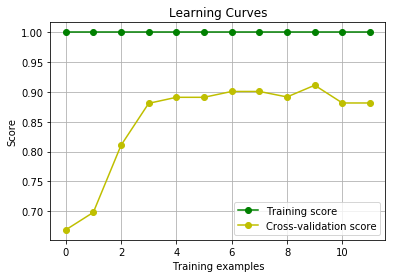

In [27]:
from utils import draw_learning_curves, randomize
#X_r, Y_r = randomize(X, Y)

draw_learning_curves(X, Y, DecisionTreeClassifier(), 12)

In [18]:
### Support Vector Machine
classifier = SVC(kernel = 'poly', degree = 2)

classifier.fit(X_train,Y_train)

y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

print('Training Accuracy: {}'.format(accuracy_score(Y_train, y_pred_train)))
print('Testing Accuracy: {}'.format(accuracy_score(Y_test, y_pred_test)))

Training Accuracy: 0.9875
Testing Accuracy: 0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

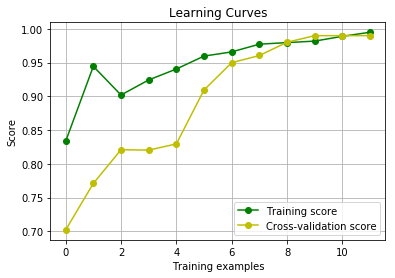

In [29]:
from utils import draw_learning_curves, randomize
#X_r, Y_r = randomize(X, Y)

draw_learning_curves(X, Y, SVC(), 12)

#### Part 2: Analyzing the learning curves
For this second part of the quiz, you can look at the curves you've drawn before, to decide which one of the three models underfits, which one overfits, and which one is just right.